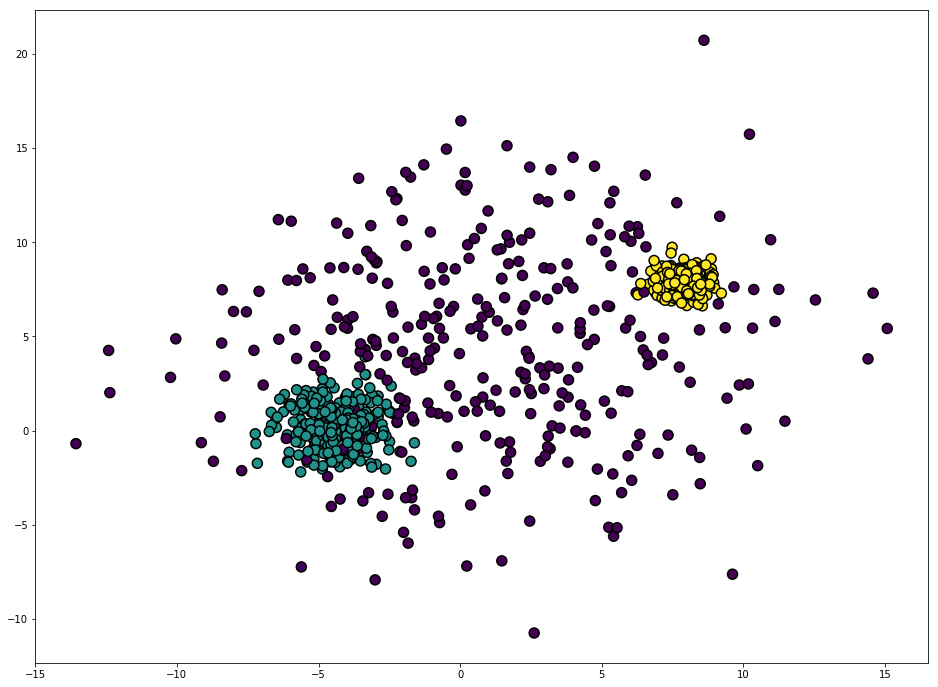

In [6]:
import numpy as np
from sklearn import cluster, datasets, mixture
import matplotlib.pyplot as plt
%matplotlib inline


n_samples = 1000
# varied is a dictionary
varied = datasets.make_blobs(n_samples=n_samples, cluster_std = [5,1,0.5], random_state = 3)

X, y = varied[0], varied[1]
plt.figure(figsize=(16,12))
plt.scatter(X[:,0],X[:,1], c=y, edgecolor='black', lw=1.5, s=100, cmap=plt.get_cmap('viridis'))
plt.show()

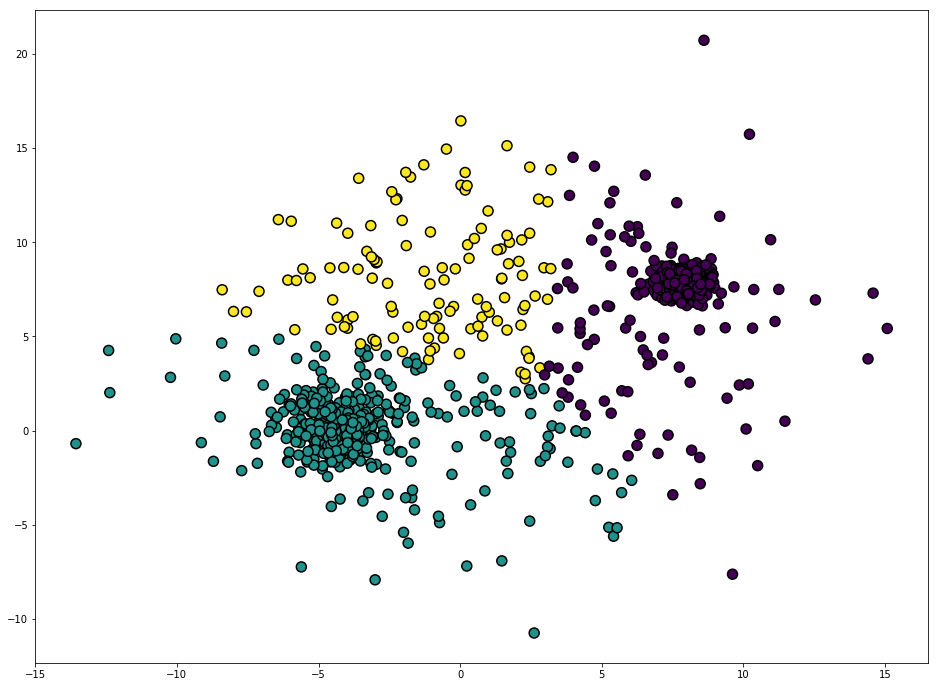

In [7]:
kmeans = cluster.KMeans(n_clusters=3)
pred = kmeans.fit_predict(X)

plt.figure(figsize=(16,12))
plt.scatter(X[:,0],X[:,1], c=pred, edgecolor='black', lw=1.5, s=100, cmap=plt.get_cmap('viridis'))
plt.show()

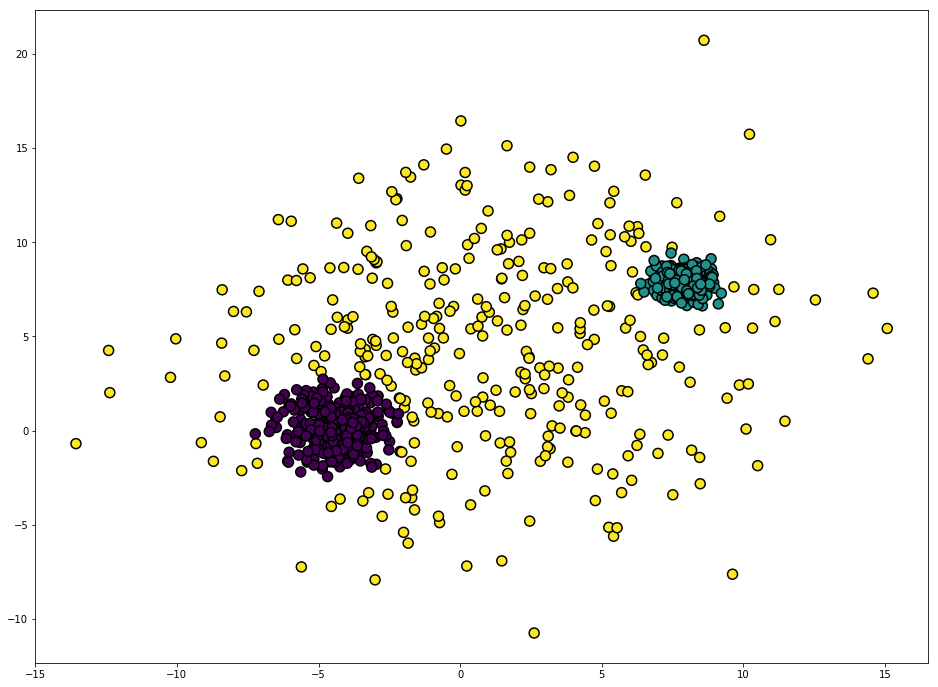

In [10]:
gmm = mixture.GaussianMixture(n_components=3)
gmm = gmm.fit(X)
pred = gmm.predict(X)

plt.figure(figsize=(16,12))
plt.scatter(X[:,0],X[:,1], c=pred, edgecolor='black', lw=1.5, s=100, cmap=plt.get_cmap('viridis'))
plt.show()

In [14]:
# Lets do the same on iris data sets where we have more then 2 features
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

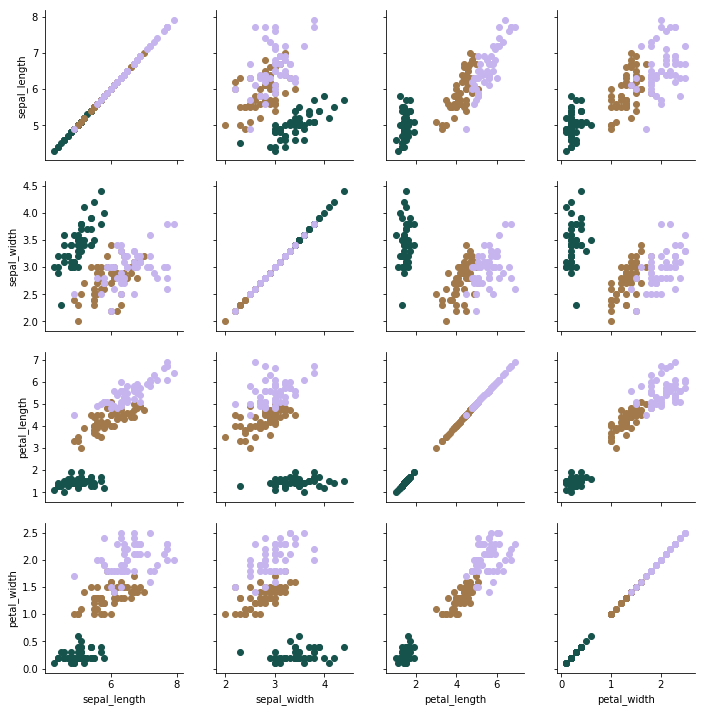

In [15]:
g = sns.PairGrid(iris, hue='species', palette=sns.color_palette('cubehelix',3), vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
g.map(plt.scatter)
plt.show()

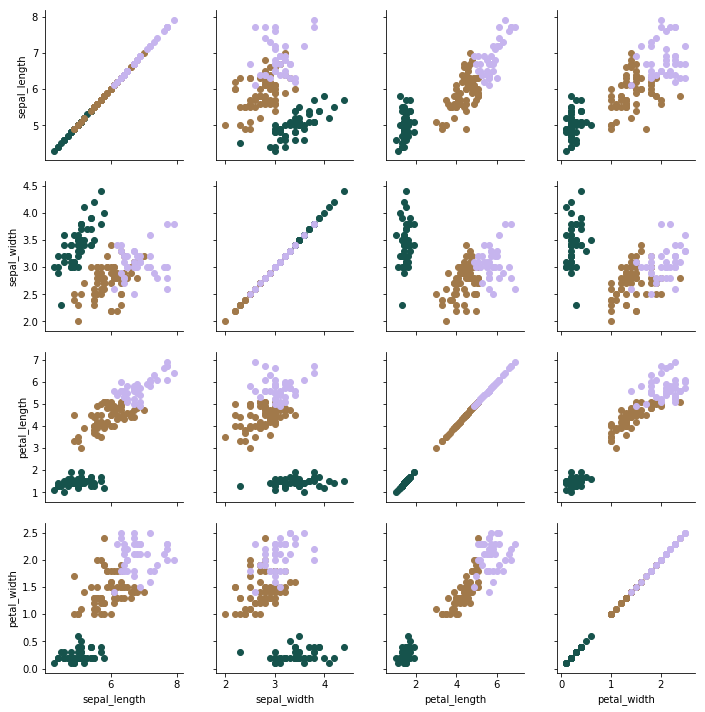

In [17]:
Kmeans_iris = cluster.KMeans(n_clusters=3)
pred = Kmeans_iris.fit_predict(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
iris['Kmeans_pred']=pred

g = sns.PairGrid(iris, hue='Kmeans_pred', palette=sns.color_palette('cubehelix',3), vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
g.map(plt.scatter)
plt.show()

In [19]:
# we cannot see the labels in better way from visualisation so lets calculate its values.
from sklearn.metrics import adjusted_rand_score
iris_kmeans_score = adjusted_rand_score(iris['species'],iris['Kmeans_pred'])
iris_kmeans_score

0.7302382722834697

In [20]:
gmm_iris = mixture.GaussianMixture(n_components=3)
gmm_i = gmm_iris.fit(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
pred = gmm_i.predict(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
iris['gmm_pred']=pred

# we cannot see the labels in better way from visualisation so lets calculate its values.
from sklearn.metrics import adjusted_rand_score
iris_gmm_score = adjusted_rand_score(iris['species'],iris['gmm_pred'])
iris_gmm_score

0.9038742317748124

So we can clearly see iris_kmeans_score (0.7302382722834697) is very less then iris_gmm_score (0.9038742317748124) and GMM doing better on iris dataset